# Cluster Analysis by machine learning model on Shopify customers dataset

### model trained on data until 4th of Dec. 2020

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import hashlib

PATH = 'all_customers_shopify_1-13.csv'
df = pd.read_csv(PATH, delimiter=',')

df.head()

,First Name,Last Name,Email,Company,Address1,Address2,City,Province,Province Code,Country,Country Code,Zip,Phone,Accepts Marketing,Total Spent,Total Orders,Tags,Note,Tax Exempt
0,Micah,Jumaquio,micahjumaq@gmail.com,NaN,177 Blackthorn Avenue,NaN,Toronto,Ontario,ON,Canada,CA,M6N 3H7,'+1 647 866 1159,yes,99.95,1,NaN,NaN,no
1,Alain,Tran,sillywiener@aol.com,NaN,Christian-Schad-Straße 2,bei Tran/Alten,Aschaffenburg,NaN,NaN,Germany,DE,63743,'+49 1590 6465323,yes,99.63,1,NaN,NaN,no
2,Nickie,Venegas,dhv2350@email.vccs.edu,NaN,4000 Foxwood dr,NaN,Virginia beach,Virginia,VA,United States,US,23462,(757) 478-8922,no,0.00,0,NaN,NaN,no
3,Victoria,Morris,tori-morris@hotmail.com,NaN,1955 SW 5th Ave,Apt 1030,Portland,Oregon,OR,United States,US,97201,(541) 294-8943,yes,0.00,0,NaN,NaN,no
4,Manjusha,Punugu,manjushapunugu@gmail.com,NaN,9073 MITCHELL DEWITT RD,NaN,PLAIN CITY,Ohio,OH,United States,US,43064,(614) 800-7089,yes,118.12,1,NaN,NaN,no


## 1. Data preview and cleaning

In [109]:
df_original = df.copy(deep=True)

df.head()

,First Name,Last Name,Email,Company,Address1,Address2,City,Province,Province Code,Country,Country Code,Zip,Phone,Accepts Marketing,Total Spent,Total Orders,Tags,Note,Tax Exempt
0,Micah,Jumaquio,micahjumaq@gmail.com,NaN,177 Blackthorn Avenue,NaN,Toronto,Ontario,ON,Canada,CA,M6N 3H7,'+1 647 866 1159,yes,99.95,1,NaN,NaN,no
1,Alain,Tran,sillywiener@aol.com,NaN,Christian-Schad-Straße 2,bei Tran/Alten,Aschaffenburg,NaN,NaN,Germany,DE,63743,'+49 1590 6465323,yes,99.63,1,NaN,NaN,no
2,Nickie,Venegas,dhv2350@email.vccs.edu,NaN,4000 Foxwood dr,NaN,Virginia beach,Virginia,VA,United States,US,23462,(757) 478-8922,no,0.00,0,NaN,NaN,no
3,Victoria,Morris,tori-morris@hotmail.com,NaN,1955 SW 5th Ave,Apt 1030,Portland,Oregon,OR,United States,US,97201,(541) 294-8943,yes,0.00,0,NaN,NaN,no
4,Manjusha,Punugu,manjushapunugu@gmail.com,NaN,9073 MITCHELL DEWITT RD,NaN,PLAIN CITY,Ohio,OH,United States,US,43064,(614) 800-7089,yes,118.12,1,NaN,NaN,no


In [110]:
df = df[['Email', 'Total Spent', 'Total Orders']]

In [111]:
df.head()

,Email,Total Spent,Total Orders
0,micahjumaq@gmail.com,99.95,1
1,sillywiener@aol.com,99.63,1
2,dhv2350@email.vccs.edu,0.00,0
3,tori-morris@hotmail.com,0.00,0
4,manjushapunugu@gmail.com,118.12,1


In [112]:
df = df[df['Total Spent'] > 0]

In [113]:
df

,Email,Total Spent,Total Orders
0,micahjumaq@gmail.com,99.95,1
1,sillywiener@aol.com,99.63,1
4,manjushapunugu@gmail.com,118.12,1
8,changeunhye@gmail.com,239.92,1
12,marymegandaly@gmail.com,236.92,1
...,...,...,...
52381,lauren.bartleymavs@gmail.com,512.87,9
52391,hodosialexandra@gmail.com,159.96,4
52396,jennifer.rankin@me.com,1185.28,25
52400,sheanaparedes@gmail.com,63.99,1


In [114]:
df['AvgOrderValue'] = df['Total Spent'] / df['Total Orders']
df.head()

,Email,Total Spent,Total Orders,AvgOrderValue
0,micahjumaq@gmail.com,99.95,1,99.95
1,sillywiener@aol.com,99.63,1,99.63
4,manjushapunugu@gmail.com,118.12,1,118.12
8,changeunhye@gmail.com,239.92,1,239.92
12,marymegandaly@gmail.com,236.92,1,236.92


In [115]:
df.describe()

,Total Spent,Total Orders,AvgOrderValue
count,14006.000000,14006.000000,14006.000000
mean,163.173157,2.648294,65.850287
std,201.861920,3.012167,38.976697
min,2.680000,1.000000,0.670000
25%,50.970000,1.000000,44.990000
50%,99.980000,1.000000,53.610000
75%,197.465000,3.000000,70.960000
max,3928.350000,48.000000,522.570000


In [116]:
df.head()

,Email,Total Spent,Total Orders,AvgOrderValue
0,micahjumaq@gmail.com,99.95,1,99.95
1,sillywiener@aol.com,99.63,1,99.63
4,manjushapunugu@gmail.com,118.12,1,118.12
8,changeunhye@gmail.com,239.92,1,239.92
12,marymegandaly@gmail.com,236.92,1,236.92


## 2. Normalize the values

#### to feed into our Cluster Analysis ML Model for training

In [117]:
# df["Email"] = df["Email"].apply(lambda x: hashlib.sha256(str(x).encode("utf-8")).hexdigest())

In [118]:
df

,Email,Total Spent,Total Orders,AvgOrderValue
0,micahjumaq@gmail.com,99.95,1,99.950000
1,sillywiener@aol.com,99.63,1,99.630000
4,manjushapunugu@gmail.com,118.12,1,118.120000
8,changeunhye@gmail.com,239.92,1,239.920000
12,marymegandaly@gmail.com,236.92,1,236.920000
...,...,...,...,...
52381,lauren.bartleymavs@gmail.com,512.87,9,56.985556
52391,hodosialexandra@gmail.com,159.96,4,39.990000
52396,jennifer.rankin@me.com,1185.28,25,47.411200
52400,sheanaparedes@gmail.com,63.99,1,63.990000


In [119]:
df_normalized = (df - df.mean()) / df.std()

In [120]:
df_normalized

,AvgOrderValue,Email,Total Orders,Total Spent
0,0.874874,NaN,-0.547212,-0.313200
1,0.866664,NaN,-0.547212,-0.314785
4,1.341050,NaN,-0.547212,-0.223188
8,4.465994,NaN,-0.547212,0.380195
12,4.389025,NaN,-0.547212,0.365333
...,...,...,...,...
52381,-0.227437,NaN,2.108683,1.732357
52391,-0.663481,NaN,0.448749,-0.015918
52396,-0.473080,NaN,7.420473,5.063396
52400,-0.047728,NaN,-0.547212,-0.491342


In [121]:
df_normalized['Email'] = df['Email']
columns_titles = ["Email", "Total Orders", "Total Spent", "AvgOrderValue"]
df_normalized = df_normalized.reindex(columns=columns_titles)
df_normalized

,Email,Total Orders,Total Spent,AvgOrderValue
0,micahjumaq@gmail.com,-0.547212,-0.313200,0.874874
1,sillywiener@aol.com,-0.547212,-0.314785,0.866664
4,manjushapunugu@gmail.com,-0.547212,-0.223188,1.341050
8,changeunhye@gmail.com,-0.547212,0.380195,4.465994
12,marymegandaly@gmail.com,-0.547212,0.365333,4.389025
...,...,...,...,...
52381,lauren.bartleymavs@gmail.com,2.108683,1.732357,-0.227437
52391,hodosialexandra@gmail.com,0.448749,-0.015918,-0.663481
52396,jennifer.rankin@me.com,7.420473,5.063396,-0.473080
52400,sheanaparedes@gmail.com,-0.547212,-0.491342,-0.047728


In [122]:
df_normalized.describe()

,Total Orders,Total Spent,AvgOrderValue
count,1.400600e+04,1.400600e+04,1.400600e+04
mean,3.246804e-17,-2.110423e-16,-1.623402e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.472118e-01,-7.950641e-01,-1.672289e+00
25%,-5.472118e-01,-5.558411e-01,-5.351990e-01
50%,-5.472118e-01,-3.130514e-01,-3.140412e-01
75%,1.167619e-01,1.698777e-01,1.310966e-01
max,1.505617e+01,1.865224e+01,1.171776e+01


## 3. Customer segmentation by Cluster K-Means Model and Analysis

#### a. Training our model using cluster k-value = 4

In [123]:
from sklearn.cluster import KMeans

kmeans_settings = {
    'algorithm': 'manual',
    'copy_x': True,
    'init': 'k-means++',
    'max_iter': 300,
    'n_clusters': 'manual',
    'n_init': 10,
    'n_jobs': None,
    'precompute_distances': 'auto',
    'random_state': None,
    'tol': 0.0001,
    'verbose': 0
}

kmeans = KMeans(n_clusters = 4, random_state=40).fit(df_normalized[["Total Orders", "Total Spent", "AvgOrderValue"]])

In [124]:
kmeans

KMeans(n_clusters=4, random_state=40)

In [125]:
four_cluster_df = df_normalized[["Total Orders", "Total Spent", "AvgOrderValue"]].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [126]:
four_cluster_df.head()

,Total Orders,Total Spent,AvgOrderValue,Cluster
0,-0.547212,-0.313200,0.874874,1
1,-0.547212,-0.314785,0.866664,1
4,-0.547212,-0.223188,1.341050,0
8,-0.547212,0.380195,4.465994,0
12,-0.547212,0.365333,4.389025,0


In [127]:
four_cluster_df.groupby('Cluster').count()['Total Spent']

Cluster
0    1746
1    9772
2     195
3    2293
Name: Total Spent, dtype: int64

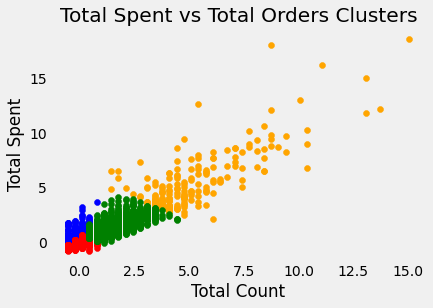

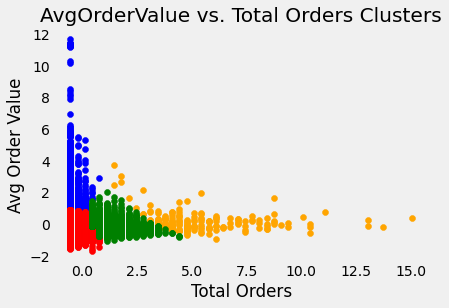

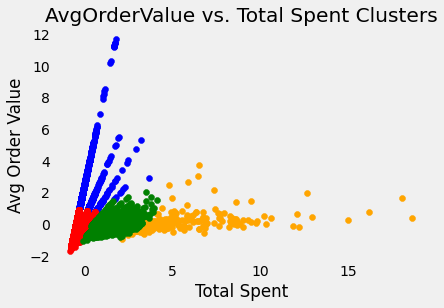

In [128]:
# now we assign each clusters based on their column values, and we visualize the data using scatterplot.

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['Total Orders'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['Total Spent'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['Total Orders'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['Total Spent'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['Total Orders'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['Total Spent'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['Total Orders'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['Total Spent'],
    c='green'
)

plt.title('Total Spent vs Total Orders Clusters')
plt.xlabel('Total Count')
plt.ylabel('Total Spent')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['Total Orders'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['Total Orders'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['Total Orders'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['Total Orders'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. Total Orders Clusters')
plt.xlabel('Total Orders')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['Total Spent'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['Total Spent'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['Total Spent'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['Total Spent'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. Total Spent Clusters')
plt.xlabel('Total Spent')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

#### b. Calculating the optimal value for k to double check accuracy

##### 1. Elbow point

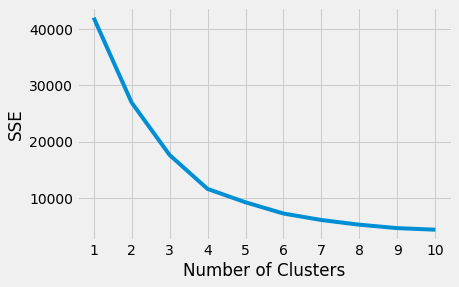

In [129]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df_normalized[['Total Spent', 'Total Orders', 'AvgOrderValue']])
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [130]:
!pip install kneed
from kneed import KneeLocator

elbow = KneeLocator(
    range (1, 11), sse, curve='convex', direction='decreasing'
)

print("Best value for k: " + str(elbow.elbow))

zsh:1: command not found: pip
Best value for k: 4


##### 2. Silhouette score

In [131]:
from sklearn.metrics import silhouette_score

for n_cluster in range(2, 12):
  kmeans = KMeans(n_clusters=n_cluster).fit(
    df_normalized[['Total Spent', 'Total Orders', 'AvgOrderValue']]
  )
  silhouette_avg = silhouette_score(
      df_normalized[['Total Spent', 'Total Orders', 'AvgOrderValue']],
      kmeans.labels_
  )
  print('Silhouette score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette score for 2 Clusters: 0.5792
Silhouette score for 3 Clusters: 0.5954
Silhouette score for 4 Clusters: 0.5955
Silhouette score for 5 Clusters: 0.5522
Silhouette score for 6 Clusters: 0.5626
Silhouette score for 7 Clusters: 0.5067
Silhouette score for 8 Clusters: 0.4756
Silhouette score for 9 Clusters: 0.4680
Silhouette score for 10 Clusters: 0.4695
Silhouette score for 11 Clusters: 0.4690


In [132]:
silhouette_score(df_normalized[['Total Spent', 'Total Orders', 'AvgOrderValue']], kmeans.labels_)

0.46904781172859

##### Strictly score-wise, k value of 3 has a slightly better silhouette score than the k value of 4.

In [133]:
kmeans = KMeans(n_clusters = 3).fit(df_normalized[["Total Orders", "Total Spent", "AvgOrderValue"]])

three_cluster_df = df_normalized[["Total Orders", "Total Spent", "AvgOrderValue"]].copy(deep=True)
three_cluster_df['Cluster'] = kmeans.labels_

In [134]:
three_cluster_df.groupby('Cluster').count()['Total Spent']

Cluster
0    10342
1     1884
2     1780
Name: Total Spent, dtype: int64

##### Conclusion: result shows that, although the score for k=3 was slightly better, it seems like k=4 is more detailed

#### c. Interpreting the customer segmentations

In [135]:
df_normalized.count()

Email            13984
Total Orders     14006
Total Spent      14006
AvgOrderValue    14006
dtype: int64

In [136]:
df_normalized = df_normalized.set_index('Email')

In [137]:
df_normalized.count()

Total Orders     14006
Total Spent      14006
AvgOrderValue    14006
dtype: int64

In [138]:
X = df_normalized[['Total Spent', 'Total Orders', 'AvgOrderValue']]
kmeans = KMeans(n_clusters=4, random_state=40).fit(X)

In [139]:
kmeans.labels_

array([1, 1, 0, ..., 2, 1, 3], dtype=int32)

In [140]:
cluster_analysis_df = X.copy(deep=True)
cluster_analysis_df['Cluster'] = kmeans.labels_

In [141]:
cluster_analysis_df.head(15)

,Total Spent,Total Orders,AvgOrderValue,Cluster
Email,,,,
micahjumaq@gmail.com,-0.313200,-0.547212,0.874874,1
sillywiener@aol.com,-0.314785,-0.547212,0.866664,1
manjushapunugu@gmail.com,-0.223188,-0.547212,1.341050,0
changeunhye@gmail.com,0.380195,-0.547212,4.465994,0
marymegandaly@gmail.com,0.365333,-0.547212,4.389025,0
deanreymangaoang@gmail.com,-0.359073,-0.547212,0.637296,1
relutes2015@gmail.com,-0.328012,-0.547212,0.798162,1
melissa.juan6112@gmail.com,-0.362689,-0.547212,0.618567,1
snreddy24@gmail.com,-0.288232,-0.547212,1.004182,0


In [142]:
kmeans.cluster_centers_

array([[ 0.05844737, -0.4804722 ,  2.12323631],
       [-0.38337254, -0.33083602, -0.3410604 ],
       [ 5.613396  ,  5.26170712,  0.15524285],
       [ 1.11192983,  1.32830405, -0.17645039]])

In [143]:
cluster_analysis_df.groupby('Cluster').count()['Total Spent']

Cluster
0    1746
1    9772
2     195
3    2293
Name: Total Spent, dtype: int64

##### 1. look at the cluster with the highest total spent

In [144]:
high_value_cluster_0 = cluster_analysis_df.loc[cluster_analysis_df['Cluster'] == 0]
high_value_cluster_1 = cluster_analysis_df.loc[cluster_analysis_df['Cluster'] == 1]
high_value_cluster_2 = cluster_analysis_df.loc[cluster_analysis_df['Cluster'] == 2]
high_value_cluster_3 = cluster_analysis_df.loc[cluster_analysis_df['Cluster'] == 3]

high_value_cluster = cluster_analysis_df.loc[cluster_analysis_df['Cluster'] == 2]
high_value_cluster.head()

,Total Spent,Total Orders,AvgOrderValue,Cluster
Email,,,,
gonzalezjocelyn1986@gmail.com,3.475479,3.768617,-0.104759,2
joeandangelina300@gmail.com,10.205574,7.752460,0.504426,2
kadinorton@gmail.com,5.501517,6.092526,-0.133335,2
zeusandjen@gmail.com,5.079100,3.104644,0.851463,2
wood.emily.marie@gmail.com,8.846180,8.748420,0.034699,2


In [145]:
high_value_cluster_0.describe()

,Total Spent,Total Orders,AvgOrderValue,Cluster
count,1746.000000,1746.000000,1746.000000,1746.0
mean,0.058447,-0.480472,2.123236,0.0
std,0.418082,0.169791,1.307626,0.0
min,-0.306166,-0.547212,0.789781,0.0
25%,-0.183891,-0.547212,1.413979,0.0
50%,-0.097434,-0.547212,1.756683,0.0
75%,0.202177,-0.547212,2.391357,0.0
max,3.658773,0.780736,11.717763,0.0


In [146]:
high_value_cluster_1.describe()

,Total Spent,Total Orders,AvgOrderValue,Cluster
count,9772.000000,9772.000000,9772.000000,9772.0
mean,-0.383373,-0.330836,-0.341060,1.0
std,0.263642,0.324338,0.395428,0.0
min,-0.795064,-0.547212,-1.672289,1.0
25%,-0.580561,-0.547212,-0.595010,1.0
50%,-0.486437,-0.547212,-0.406917,1.0
75%,-0.266274,-0.215225,-0.150610,1.0
max,0.620408,0.780736,0.901814,1.0


In [147]:
high_value_cluster_2.describe()

,Total Spent,Total Orders,AvgOrderValue,Cluster
count,195.000000,195.000000,195.000000,195.0
mean,5.613396,5.261707,0.155243,2.0
std,2.773298,2.222279,0.623454,0.0
min,2.143727,1.444709,-0.961437,2.0
25%,3.650078,3.768617,-0.210830,2.0
50%,4.722272,4.764578,0.033932,2.0
75%,6.734043,6.092526,0.335074,2.0
max,18.652239,15.056171,3.718698,2.0


In [148]:
high_value_cluster_3.describe()

,Total Spent,Total Orders,AvgOrderValue,Cluster
count,2293.000000,2293.000000,2293.000000,2293.0
mean,1.111930,1.328304,-0.176450,3.0
std,0.694976,0.677385,0.381756,0.0
min,-0.050595,0.448749,-1.035412,3.0
25%,0.608024,0.780736,-0.424021,3.0
50%,0.957124,1.112723,-0.260383,3.0
75%,1.436362,1.776696,0.011820,3.0
max,4.143906,4.432591,2.026118,3.0


In [149]:
# bringing in the original shopify dataset and analyze
# set the email as index keys for both datasets
df_original = df_original.set_index('Email')

# add the AvgOrderValue
df_original['AvgOrderValue'] = df_original['Total Spent'] / df_original['Total Orders']

df_original.index = df_original.index.map(str)
high_value_cluster.index = high_value_cluster.index.map(str)

high_value_cluster

,Total Spent,Total Orders,AvgOrderValue,Cluster
Email,,,,
gonzalezjocelyn1986@gmail.com,3.475479,3.768617,-0.104759,2
joeandangelina300@gmail.com,10.205574,7.752460,0.504426,2
kadinorton@gmail.com,5.501517,6.092526,-0.133335,2
zeusandjen@gmail.com,5.079100,3.104644,0.851463,2
wood.emily.marie@gmail.com,8.846180,8.748420,0.034699,2
...,...,...,...,...
m_elle79@hotmail.com,9.484636,8.748420,0.148720,2
heidibb93@hotmail.com,8.599576,7.088486,0.340688,2
josephine.sivertsson@hotmail.com,18.652239,15.056171,0.410254,2


In [150]:
df_original.loc[high_value_cluster.index].describe()

,Total Spent,Total Orders,AvgOrderValue
count,195.000000,195.000000,195.000000
mean,1296.304051,18.497436,71.901141
std,559.823184,6.693877,24.300161
min,595.910000,7.000000,28.376667
25%,899.985000,14.000000,57.632825
50%,1116.420000,17.000000,67.172857
75%,1522.520000,21.000000,78.910353
max,3928.350000,48.000000,210.792857


In [151]:
# we pinpoint the customers in cluster 3 now

pd.DataFrame(
    df_original.loc[
              high_value_cluster.index].groupby(
               'Country').count()['Total Spent'].sort_values(
                   ascending=False).head()
)

,Total Spent
Country,
United States,152
Canada,10
United Kingdom,8
Australia,7
Germany,5


In [152]:
df_original.loc[high_value_cluster.index]

,First Name,Last Name,Company,Address1,Address2,City,Province,Province Code,Country,Country Code,Zip,Phone,Accepts Marketing,Total Spent,Total Orders,Tags,Note,Tax Exempt,AvgOrderValue
Email,,,,,,,,,,,,,,,,,,,
gonzalezjocelyn1986@gmail.com,Jocelyn,Gonzalez,NaN,1726 W Chicago Ave Apt 5,NaN,Chicago,Illinois,IL,United States,US,60622-5000,(773) 961-5821,yes,864.74,14,NaN,NaN,no,61.767143
joeandangelina300@gmail.com,Rachael,Eversole,NaN,1001 East 2nd street,Unit 1,Anamosa,Iowa,IA,United States,US,52205,(319) 651-1552,yes,2223.29,26,"Active Subscriber, ANNUAL",NaN,no,85.511154
kadinorton@gmail.com,Kat,Stevens,NaN,966 W 1325 S,NaN,Cedar City,Utah,UT,United States,US,84720,4355924465,yes,1273.72,21,"Active Subscriber, SEASONAL",NaN,no,60.653333
zeusandjen@gmail.com,Jennifer,Svane,NaN,2607 Larlin Dr,NaN,Everett,Washington,WA,United States,US,98203,(504) 952-4375,yes,1188.45,12,"Active Subscriber, ANNUAL",NaN,no,99.037500
wood.emily.marie@gmail.com,Emily,Wood,NaN,1102 East 1st Street,NaN,McCook,Nebraska,NE,United States,US,69001,+13083408995,yes,1948.88,29,"Active Subscriber, ANNUAL",NaN,no,67.202759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m_elle79@hotmail.com,Michelle,Butler,NaN,4169 checkmate dr,NaN,Anchorage,Alaska,AK,United States,US,99508,(907) 406-4148,yes,2077.76,29,"Active Subscriber, ANNUAL, newsletter",NaN,no,71.646897
heidibb93@hotmail.com,Heidi,Bjørneklett,NaN,Matre 16,NaN,Matredal,NaN,NaN,Norway,NO,5984,'+47 976 03 010,yes,1899.10,24,"Active Subscriber, ANNUAL, SEASONAL",NaN,no,79.129167
josephine.sivertsson@hotmail.com,Josephine,Sivertsson,NaN,Bergslagsvagen 43,NaN,Finspang,NaN,NaN,Sweden,SE,61236,073-396 55 79,yes,3928.35,48,"Active Subscriber, ANNUAL, newsletter",NaN,no,81.840625


In [153]:
top_50 = df_original.sort_values('Total Spent', ascending=False).head(50)

In [154]:
top_50
# export the top 50, then for each email (key), get all the items they purchased and do analysis

,First Name,Last Name,Company,Address1,Address2,City,Province,Province Code,Country,Country Code,Zip,Phone,Accepts Marketing,Total Spent,Total Orders,Tags,Note,Tax Exempt,AvgOrderValue
Email,,,,,,,,,,,,,,,,,,,
josephine.sivertsson@hotmail.com,Josephine,Sivertsson,NaN,Bergslagsvagen 43,NaN,Finspang,NaN,NaN,Sweden,SE,61236,073-396 55 79,yes,3928.35,48,"Active Subscriber, ANNUAL, newsletter",NaN,no,81.840625
tmanini@hotmail.com,Tara,Manini,NaN,325 Coronado Ave,304,Daly City,California,CA,United States,US,94015,4153857538,yes,3807.53,29,"Active Subscriber, SEASONAL",NaN,no,131.294138
aortiz258@hotmail.com,Alba,Ortiz Reyes,NaN,1494 W 2165 S,NaN,Wellsvile,Utah,UT,United States,US,84339,+17872200693,yes,3434.52,36,"Active Subscriber, ANNUAL, newsletter",NaN,no,95.403333
maw105_92@yahoo.com,Willimae,Villajin,NaN,1122 W 204th Street,NaN,Torrance,California,CA,United States,US,90502,(619) 882-7123,yes,3193.07,42,"Active Subscriber, ANNUAL, SEASONAL",NaN,no,76.025476
k.guidry1992@gmail.com,Kereka,Guidry,NaN,19509 Divot Place,NaN,Gaithersburg,Maryland,MD,United States,US,20886,+12404419922,yes,2784.17,33,"Active Subscriber, ANNUAL",NaN,no,84.368788
angelhuliv@gmail.com,Angel,Hu,NaN,120 Carson Rd.,NaN,Seneca,South Carolina,SC,United States,US,29678,'+1 864-325-5936,yes,2718.45,19,"Active Subscriber, ANNUAL",NaN,no,143.076316
bannana_1444@hotmail.com,Hannah,Horejsi,NaN,66874 200th St,NaN,Alden,Minnesota,MN,United States,US,56009,(507) 383-8929,yes,2634.62,44,"Active Subscriber, ANNUAL",NaN,no,59.877727
lynne1021@gmail.com,Courtney,Wirtz,NaN,1706 Sandusky North Street,NaN,Pittsburgh,Pennsylvania,PA,United States,US,15214,+14126803869,yes,2608.96,29,"Active Subscriber, ANNUAL, newsletter",NaN,no,89.964138
megan_kay@live.com,Megan,Butler Stoney,NaN,"Flat 1, 38 Turama Rd, Royal Oak",NaN,Auckland,Auckland,AUK,New Zealand,NZ,1023,+64212049228,yes,2558.98,42,"Active Subscriber, ANNUAL",NaN,no,60.928095


In [155]:
top_50.to_csv('top_50_vips.csv')

In [156]:
# get all orders data from shopify and combine to one dataset

all_files = ['orders_export_1.csv', 'orders_export_2.csv', 'orders_export_3.csv']

df_from_each_file = (pd.read_csv(f) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)

<ipython-input-156-382dbb2e7ea6>:6: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pd.concat(df_from_each_file, ignore_index=True)
<ipython-input-156-382dbb2e7ea6>:6: DtypeWarning: Columns (52) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pd.concat(df_from_each_file, ignore_index=True)
<ipython-input-156-382dbb2e7ea6>:6: DtypeWarning: Columns (64) have mixed types.Specify dtype option on import or set low_memory=False.
  df = pd.concat(df_from_each_file, ignore_index=True)


In [157]:
# for each email within the vip list, find all orders that has been made from them
matched_df = top_50.merge(df, on='Email', how='inner')
matched_df.head()

,Email,First Name,Last Name,Company,Address1,Address2,City,Province,Province Code,Country,...,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone_y,Receipt Number,Duties
0,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,NaN,Bergslagsvagen 43,NaN,Finspang,NaN,NaN,Sweden,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.673397e+10,NaN,NaN
1,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,NaN,Bergslagsvagen 43,NaN,Finspang,NaN,NaN,Sweden,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.673397e+10,NaN,NaN
2,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,NaN,Bergslagsvagen 43,NaN,Finspang,NaN,NaN,Sweden,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.673397e+10,NaN,NaN
3,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,NaN,Bergslagsvagen 43,NaN,Finspang,NaN,NaN,Sweden,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.673397e+10,NaN,NaN
4,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,NaN,Bergslagsvagen 43,NaN,Finspang,NaN,NaN,Sweden,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.673397e+10,NaN,NaN


In [158]:
matched_df = matched_df[['Email',  'First Name', 'Last Name', 'Address1', 'City', 'Province Code', 'Country', 'Country Code', 'Zip', 'Total Spent', 'AvgOrderValue', 'Total Orders', 'Tags_x', 'Vendor', 'Id', 'Lineitem name', 'Lineitem sku', 'Lineitem quantity', 'Lineitem price', 'Subtotal', 'Paid at', 'Discount Code']]

In [159]:
matched_df.head(50)

,Email,First Name,Last Name,Address1,City,Province Code,Country,Country Code,Zip,Total Spent,...,Tags_x,Vendor,Id,Lineitem name,Lineitem sku,Lineitem quantity,Lineitem price,Subtotal,Paid at,Discount Code
0,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,Bergslagsvagen 43,Finspang,NaN,Sweden,SE,61236,3928.35,...,"Active Subscriber, ANNUAL, newsletter",STRAY KIDS,2.968210e+12,[Pre-Order] STRAY KIDS 2021 Season's Greetings,Album Set - 140110 - STRAY KIDS - 스트레이 키즈 2021...,1,69.99,60.97,2020-12-08 01:30:54 -0500,52b54d8faef5
1,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,Bergslagsvagen 43,Finspang,NaN,Sweden,SE,61236,3928.35,...,"Active Subscriber, ANNUAL, newsletter",Route,NaN,Route Package Protection - $0.98,ROUTEINS10,1,0.98,NaN,NaN,NaN
2,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,Bergslagsvagen 43,Finspang,NaN,Sweden,SE,61236,3928.35,...,"Active Subscriber, ANNUAL, newsletter",BoA,2.967275e+12,BoA Official Light Stick,Lightstick - 120006\t- BoA - 보아 공식응원봉 - DA,1,54.00,120.22,2020-12-07 17:26:23 -0500,ADEQA
3,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,Bergslagsvagen 43,Finspang,NaN,Sweden,SE,61236,3928.35,...,"Active Subscriber, ANNUAL, newsletter",BLACKPINK,NaN,BLACKPINK Official Light Stick Ver.2 (Limited ...,Lightstick - 120049 - BLACKPINK - 블랙핑크 공식 응원봉 ...,1,69.99,NaN,NaN,NaN
4,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,Bergslagsvagen 43,Finspang,NaN,Sweden,SE,61236,3928.35,...,"Active Subscriber, ANNUAL, newsletter",Route,NaN,Route Package Protection - $2.55,ROUTEINS18,1,2.55,NaN,NaN,NaN
5,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,Bergslagsvagen 43,Finspang,NaN,Sweden,SE,61236,3928.35,...,"Active Subscriber, ANNUAL, newsletter",The Daebak Company,2.930572e+12,Esther Bunny is Daebak - Annual Auto renew (Sh...,Esther Bunny is Daebak - Annual,1,259.96,259.96,2020-11-26 10:31:45 -0500,NaN
6,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,Bergslagsvagen 43,Finspang,NaN,Sweden,SE,61236,3928.35,...,"Active Subscriber, ANNUAL, newsletter",The Daebak Company,2.930535e+12,CJ is Daebak - Annual Auto renew (Ships every ...,CJ is Daebak - Annual,1,159.96,163.31,2020-11-26 10:15:20 -0500,NaN
7,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,Bergslagsvagen 43,Finspang,NaN,Sweden,SE,61236,3928.35,...,"Active Subscriber, ANNUAL, newsletter",Route,NaN,Route Package Protection - $3.35,ROUTEINS22,1,3.35,NaN,NaN,NaN
8,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,Bergslagsvagen 43,Finspang,NaN,Sweden,SE,61236,3928.35,...,"Active Subscriber, ANNUAL, newsletter",Daebak Box,2.919386e+12,"Annual (ships once every season, auto-renews e...",DBB_Annual,1,0.00,0.00,NaN,NaN
9,josephine.sivertsson@hotmail.com,Josephine,Sivertsson,Bergslagsvagen 43,Finspang,NaN,Sweden,SE,61236,3928.35,...,"Active Subscriber, ANNUAL, newsletter",The Daebak Company,2.895230e+12,Flower Pattern Mask 2ea - Sky Blue / Ivory Pink,Health - 150037 - The Daebak Company - Flower ...,1,23.99,96.09,2020-11-11 11:48:47 -0500,NaN


In [160]:
matched_df.loc[matched_df.duplicated(['Email']), ['Email', 'First Name', 'Last Name', 'Address1', 'City', 'Province Code', 'Country Code', 'Zip', 'Total Spent', 'AvgOrderValue', 'Tags_x', 'Total Orders']] = np.nan

In [161]:
matched_df.to_csv('top_50_vip_orders.csv')

## 3. Customer segmentation by Gaussian Mixture Model

#### a. Training the model

In [162]:
from sklearn.mixture import GaussianMixture

gaussian = GaussianMixture(n_components = 3, n_init = 10)
gaussian.fit(df_normalized[["Total Orders", "Total Spent", "AvgOrderValue"]])

GaussianMixture(n_components=3, n_init=10)

In [163]:
gaussian.weights_

array([0.28882039, 0.54040574, 0.17077386])

In [164]:
gaussian.means_

array([[ 0.17803077, -0.01449125, -0.39116596],
       [-0.54721183, -0.45099863,  0.16120966],
       [ 1.43053211,  1.45167188,  0.15141709]])

In [165]:
gaussian.covariances_

array([[[ 1.81676929e-01,  1.30816847e-01, -7.69073117e-03],
        [ 1.30816847e-01,  1.10760971e-01,  2.46121514e-02],
        [-7.69073117e-03,  2.46121514e-02,  5.94399170e-02]],

       [[ 1.00000000e-06,  8.36520012e-30, -2.75984276e-30],
        [ 8.35852981e-30,  5.65919923e-02,  2.93087080e-01],
        [-2.75317244e-30,  2.93087080e-01,  1.51791105e+00]],

       [[ 2.50042933e+00,  2.31302970e+00, -3.66167287e-01],
        [ 2.31302970e+00,  2.73752294e+00,  9.81924379e-02],
        [-3.66167287e-01,  9.81924379e-02,  5.87454834e-01]]])

In [166]:
gaussian.converged_

True

In [167]:
gaussian.n_iter_

12

In [168]:
gaussian.predict(df_normalized[["Total Orders", "Total Spent", "AvgOrderValue"]])

array([1, 1, 1, ..., 2, 1, 0])

In [169]:
probs = gaussian.predict_proba(df_normalized[["Total Orders", "Total Spent", "AvgOrderValue"]])

In [170]:
x_new, y_new = gaussian.sample(6)
x_new

array([[-0.19886653, -0.30345429, -0.4356238 ],
       [ 0.08045707, -0.14966809, -0.49774202],
       [ 0.64704619,  0.22425028, -0.55455168],
       [ 0.2666657 ,  0.15415708, -0.14623066],
       [ 0.04552   , -0.02709508, -0.21056853],
       [ 0.40681188,  0.29824017, -0.12716834]])

In [171]:
y_new

array([0, 0, 0, 0, 0, 0])

In [172]:
gaussian.score_samples(df_normalized[["Total Orders", "Total Spent", "AvgOrderValue"]])

array([ 10.04852149,  10.05235934,   9.75775769, ..., -20.6861057 ,
        10.20191071,  -0.10265329])

In [173]:
X = df_normalized[["Total Orders", "Total Spent", "AvgOrderValue"]]

from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))


In [174]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X['Total Orders'], X['Total Spent'], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X['Total Orders'], X['Total Spent'], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    # for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
    #     draw_ellipse(pos, covar, alpha=w * w_factor)
    
    for pos, covar, w in zip(gmm.means_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [175]:
# gaussian = GaussianMixture(n_components=4, random_state=42)
# plot_gmm(gaussian, X)